In [373]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [374]:
df = pd.read_pickle("./mydata_1000.pkl")  

In [375]:
#df.head()

## Some Basic Feature Exploration

In [376]:
df.columns

Index(['resource_state', 'name', 'distance', 'moving_time', 'elapsed_time',
       'total_elevation_gain', 'type', 'sport_type', 'workout_type', 'id',
       'start_date', 'start_date_local', 'timezone', 'utc_offset',
       'location_city', 'location_state', 'location_country',
       'achievement_count', 'kudos_count', 'comment_count', 'athlete_count',
       'photo_count', 'trainer', 'commute', 'manual', 'private', 'visibility',
       'flagged', 'gear_id', 'start_latlng', 'end_latlng', 'average_speed',
       'max_speed', 'average_cadence', 'has_heartrate', 'heartrate_opt_out',
       'display_hide_heartrate_option', 'elev_high', 'elev_low', 'upload_id',
       'upload_id_str', 'external_id', 'from_accepted_tag', 'pr_count',
       'total_photo_count', 'has_kudoed', 'athlete.id',
       'athlete.resource_state', 'map.id', 'map.summary_polyline',
       'map.resource_state', 'average_temp', 'average_watts', 'kilojoules',
       'device_watts', 'average_heartrate', 'max_heartrate', '

In [377]:
df['type'].value_counts()

Run               305
Rowing            257
Ride              235
WeightTraining     90
Hike               60
Swim               36
Workout            15
Walk                2
Name: type, dtype: int64

## Feature Engineering

In [378]:
# Change column names to be specific about units
df = df.rename(columns={'average_speed': 'average_speed_m/s', 'distance':'distance_m'})


In [379]:
def format_date_string(date_string):
    return datetime.fromisoformat(date_string[:-1] + '+00:00')

def day_of_week(formatted_date_string):
    #weeks = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
    return formatted_date_string.weekday()

def am_or_pm(formatted_date_string):
    if formatted_date_string.hour <12:
        return 'am'
    else:
        return 'pm'

In [380]:
df['formatted_start_date']=df['start_date'].apply(format_date_string)
df['start_date_DOW']=df['formatted_start_date'].apply(day_of_week)
df['start_date_am/pm']=df['formatted_start_date'].apply(am_or_pm)

In [381]:
df['distance_miles'] = df['distance_m']/1609.34
df['distance_km'] = df['distance_m']/1000
df['average_speed_km/h'] = df['average_speed_m/s']*(3.6)
df['average_speed_min/mile'] = (df['moving_time']/df['distance_m'])*(1609.34/60)


## Basic Plots

In [382]:
# Remove indoor activities with distance =0
df_rides = df[(df['type']=='Ride') & (df['distance_m']>0)]
df_runs = df[(df['type']=='Run') & (df['distance_m']>0)]

In [383]:
print("Average distance per run", df_runs['distance_miles'].mean())
print("Average distance per ride", df_rides['distance_km'].mean())

Average distance per run 4.695432828894117
Average distance per ride 33.279708


<AxesSubplot:>

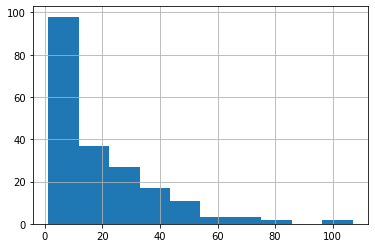

In [384]:
df_rides['distance_miles'].hist()

<AxesSubplot:>

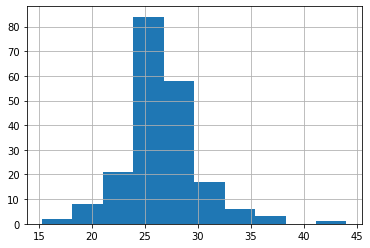

In [385]:
df_rides['average_speed_km/h'].hist()

<AxesSubplot:>

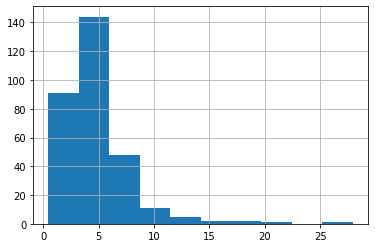

In [386]:
df_runs['distance_miles'].hist()

<AxesSubplot:>

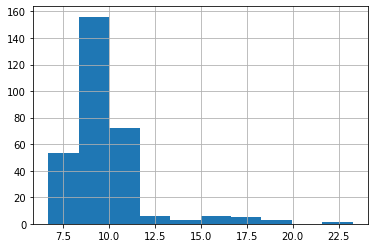

In [387]:
df_runs['average_speed_min/mile'].hist()

<AxesSubplot:>

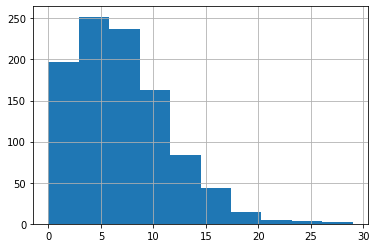

In [388]:
df['kudos_count'].hist()

In [389]:
df['kudos_count'].mean()

6.764

## Exploring Some Cycling Data

<AxesSubplot:xlabel='start_date_DOW', ylabel='Count'>

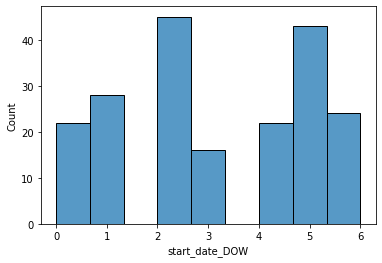

In [390]:
sns.histplot(
    data = df_rides,
    x = 'start_date_DOW')

<AxesSubplot:xlabel='average_heartrate', ylabel='average_speed_km/h'>

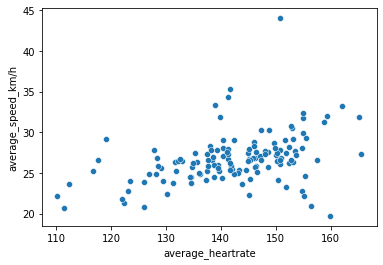

In [391]:
sns.scatterplot(
    data = df_rides[df_rides['has_heartrate']],
    x = 'average_heartrate',
    y = 'average_speed_km/h')

<AxesSubplot:xlabel='distance_km', ylabel='average_speed_km/h'>

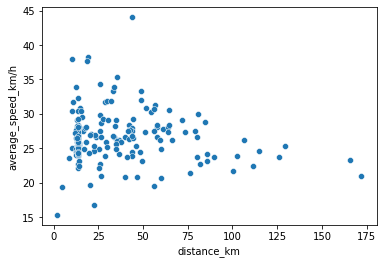

In [392]:
sns.scatterplot(
    data = df_rides,
    x = 'distance_km',
    y = 'average_speed_km/h')


<AxesSubplot:xlabel='distance_km', ylabel='kudos_count'>

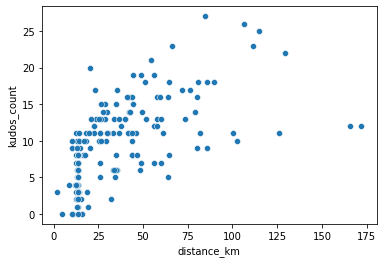

In [393]:
sns.scatterplot(
    data = df_rides,
    x = 'distance_km',
    y = 'kudos_count')


<AxesSubplot:xlabel='average_speed_km/h', ylabel='kudos_count'>

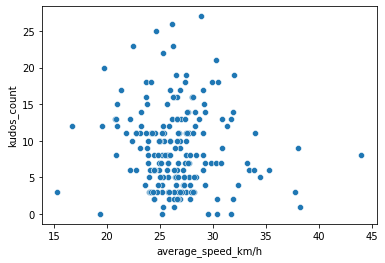

In [394]:
sns.scatterplot(
    data = df_rides,
    x = 'average_speed_km/h',
    y = 'kudos_count')


<AxesSubplot:xlabel='achievement_count', ylabel='kudos_count'>

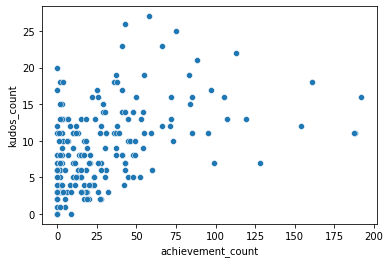

In [395]:
sns.scatterplot(
    data = df_rides,
    x = 'achievement_count',
    y = 'kudos_count')


<AxesSubplot:xlabel='start_date_DOW', ylabel='average_speed_km/h'>

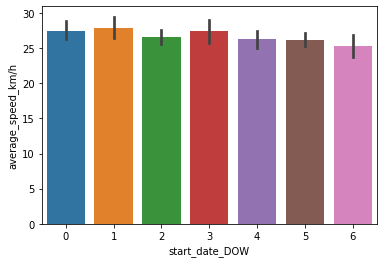

In [396]:
sns.barplot(
    data=df_rides,
    x='start_date_DOW',
    y='average_speed_km/h'
)

<AxesSubplot:xlabel='start_date_DOW', ylabel='distance_km'>

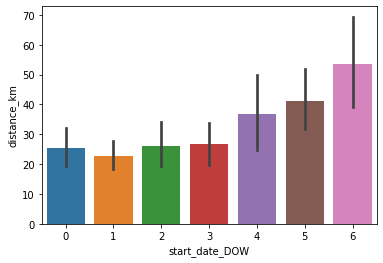

In [397]:
sns.barplot(
    data=df_rides,
    x='start_date_DOW',
    y='distance_km'
)

<AxesSubplot:xlabel='start_date_DOW', ylabel='kudos_count'>

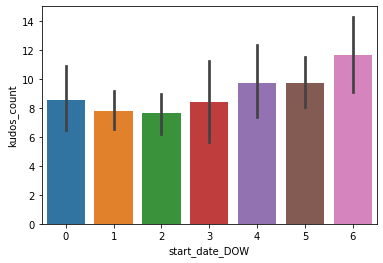

In [398]:
sns.barplot(
    data=df_rides,
    x='start_date_DOW',
    y='kudos_count'
)

<AxesSubplot:xlabel='start_date_am/pm'>

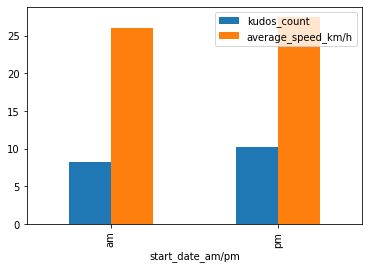

In [399]:
df_rides.groupby(['start_date_am/pm'])[['kudos_count','average_speed_km/h']].mean().plot.bar()

## Some Running Data

<AxesSubplot:xlabel='start_date_DOW', ylabel='Count'>

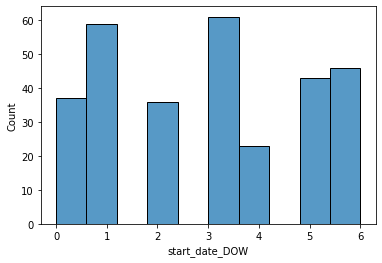

In [400]:
sns.histplot(
    data =df_runs,
    x='start_date_DOW')

<AxesSubplot:xlabel='average_heartrate', ylabel='average_speed_min/mile'>

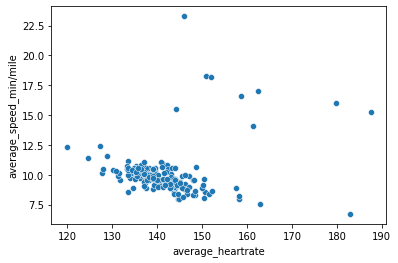

In [401]:
sns.scatterplot(
 data=df_runs[df_runs['has_heartrate']], 
 x="average_heartrate",
 y="average_speed_min/mile",
)

<AxesSubplot:xlabel='distance_km', ylabel='average_speed_min/mile'>

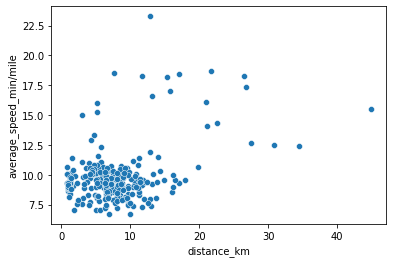

In [402]:
sns.scatterplot(
 data=df_runs, 
 x="distance_km",
 y="average_speed_min/mile",
)

<AxesSubplot:xlabel='distance_km', ylabel='kudos_count'>

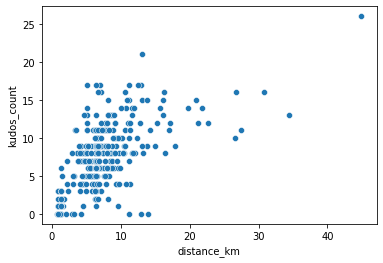

In [403]:
sns.scatterplot(
 data=df_runs, 
 x="distance_km",
 y="kudos_count",
)

<AxesSubplot:xlabel='start_date_DOW', ylabel='distance_km'>

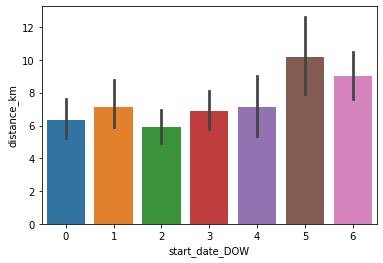

In [404]:
sns.barplot(
    data=df_runs,
    x='start_date_DOW',
    y='distance_km'
)

<AxesSubplot:xlabel='start_date_am/pm'>

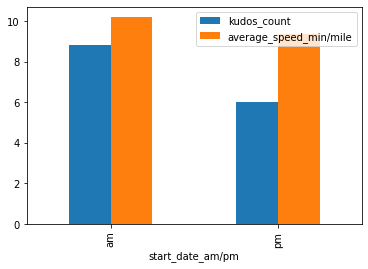

In [405]:
df_runs.groupby(['start_date_am/pm'])[['kudos_count','average_speed_min/mile']].mean().plot.bar()